In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
# Source Data
data_fest = pd.read_csv('data/datafest2018-Updated-April12.csv')

In [3]:
data_fest.head()

,date,companyId,jobId,country,stateProvince,city,avgOverallRating,numReviews,industry,normTitle,...,experienceRequired,estimatedSalary,salaryCurrency,jobLanguage,supervisingJob,licenseRequiredJob,educationRequirements,jobAgeDays,clicks,localClicks
0,2016-11-01,company00000,job0000000,CA,ON,Cambridge,0.0,NaN,NaN,driver,...,NaN,40600,NaN,EN,0.0,0.0,None,99,4,1
1,2016-11-01,company00002,job0000002,US,AZ,Peoria,0.0,NaN,NaN,customer service representative,...,NaN,22800,NaN,EN,0.0,0.0,High School,99,12,2
2,2016-11-01,company00003,job0000003,US,GA,Cartersville,3.7,71.0,NaN,host/hostess,...,NaN,22500,NaN,EN,0.0,0.0,None,99,15,3
3,2016-11-01,company00005,job0000005,US,AR,Malvern,5.0,46.0,NaN,data entry clerk,...,NaN,26100,NaN,EN,0.0,0.0,High School,99,25,8
4,2016-11-01,company00005,job0000006,US,AR,Augusta,5.0,46.0,NaN,data entry clerk,...,NaN,26200,NaN,EN,0.0,0.0,High School,99,33,1


In [4]:
data_dict = pd.read_excel('data/2018 DataFest Data Dictionary-updatedApril6.xlsx')
data_dict.head()

,Column,Definition,Comment
0,date,Unixtime date when events occured.,NaN
1,companyId,-,NaN
2,jobId,-,NaN
3,country,Country of job-posting.,NaN
4,stateProvince,Name of the state or province of the job posting.,NaN


# Investigate Features

In [5]:
# Variables associated with the data
features = list(data_dict.Column.values)
print(features)
print('There are ' + str(len(features)) + ' variables in total')

['date', 'companyId', 'jobId', 'country', 'stateProvince', 'city', 'avgOverallCompanyRating', 'numOfRatings', 'industry', 'normTitle', 'normTitleCategory', 'descriptionCharacterLength', 'descriptionWordCount', 'experienceRequired', 'estimatedSalary', 'salaryCurrency', 'jobLanguage', 'supervisingJob', 'licenseRequiredJob', 'educationRequirement', 'jobAgeDays', 'clicks', 'localClicks']
There are 23 variables in total


Let's investigate features by different types (id, location, ratings, description of job application, status of job application).

In [6]:
ids = ['companyId', 'jobId']
locations = ['country', 'stateProvince', 'city']
ratings = ['avgOverallCompanyRating', 'numOfRatings']
descriptions = ['industry', 'normTitle', 'normTitleCategory', 'descriptionCharacterLength', 
                 'descriptionWordCount', 'experienceRequired', 'estimatedSalary', 'salaryCurrency',
                 'jobLanguage', 'supervisingJob', 'licenseRequiredJob', 'educationRequirement']
status = ['jobAgeDays', 'clicks', 'localClicks']

In [7]:
experience_level = {}
for i in data_fest.experienceRequired.unique():
    if np.isnan(i): experience_level[i] = 'not specified'
    elif i < 1 : experience_level[i] = 'less than 1 year'
    elif i < 2: experience_level[i] = '1+ year'
    elif i < 3: experience_level[i] = '2+ year'
    elif i < 4: experience_level[i] = '3+ year'
    elif i < 5: experience_level[i] = '4+ year'
    elif i < 6: experience_level[i] = '5+ year'
    elif i < 7: experience_level[i] = '6+ year'
    elif i < 8: experience_level[i] = '7+ year'
    elif i < 9: experience_level[i] = '8+ year'
    elif i < 10: experience_level[i] = '9+ year'
    else: experience_level[i] = '10+ year'

data_fest['experienceLevel'] = data_fest['experienceRequired'].map(experience_level)
data_fest.experienceLevel.value_counts()

not specified       9370287
2+ year             1247415
3+ year              895597
1+ year              783045
5+ year              769437
less than 1 year     652741
10+ year             299681
4+ year              217857
7+ year              133225
8+ year              112190
6+ year               95316
9+ year                9244
Name: experienceLevel, dtype: int64

In [8]:
data_fest['% of local clicks'] = round(data_fest.localClicks/data_fest.clicks * 100,1)
data_fest.head()

,date,companyId,jobId,country,stateProvince,city,avgOverallRating,numReviews,industry,normTitle,...,salaryCurrency,jobLanguage,supervisingJob,licenseRequiredJob,educationRequirements,jobAgeDays,clicks,localClicks,experienceLevel,% of local clicks
0,2016-11-01,company00000,job0000000,CA,ON,Cambridge,0.0,NaN,NaN,driver,...,NaN,EN,0.0,0.0,None,99,4,1,not specified,25.0
1,2016-11-01,company00002,job0000002,US,AZ,Peoria,0.0,NaN,NaN,customer service representative,...,NaN,EN,0.0,0.0,High School,99,12,2,not specified,16.7
2,2016-11-01,company00003,job0000003,US,GA,Cartersville,3.7,71.0,NaN,host/hostess,...,NaN,EN,0.0,0.0,None,99,15,3,not specified,20.0
3,2016-11-01,company00005,job0000005,US,AR,Malvern,5.0,46.0,NaN,data entry clerk,...,NaN,EN,0.0,0.0,High School,99,25,8,not specified,32.0
4,2016-11-01,company00005,job0000006,US,AR,Augusta,5.0,46.0,NaN,data entry clerk,...,NaN,EN,0.0,0.0,High School,99,33,1,not specified,3.0


In [9]:
# Create subsets of data by country
df_us = data_fest[data_fest.country == 'US']
df_ca = data_fest[data_fest.country == 'CA']
df_de = data_fest[data_fest.country == 'DE']
dict_country = {'US': df_us, 'Canada': df_ca, 'Germany': df_de}

# Investigate locations

In [10]:
def plot_pie(value_count):
    # Data to plot
    labels = value_count.index
    sizes = value_count
    explode = []
    sizesum = value_count.sum()
    for size in sizes: 
        if size/sizesum < 0.02: explode.append(0.5)
        else: explode.append(0)
            
    # Plot
    plt.pie(sizes, explode=explode, autopct='%1.1f%%', labels=labels)

    plt.axis('equal')
    plt.show()

In [11]:
def create_summary(country, feature, top=5):
    print(country + ":")
    df_country = dict_country[country]
    df_feature = df_country[feature].value_counts()
    top10 = df_feature[df_feature.index != 'UNKNOWN'].head(top)
    unknown = df_feature[df_feature.index == 'UNKNOWN']
    rest = df_feature[df_feature.index != 'UNKNOWN'].tail(len(df_feature)-6).sum()
    summary = top10.append(unknown)
    if rest != 0:
        summary = summary.append(pd.Series(rest, index=['Others']))
    plot_pie(summary)

    


US:


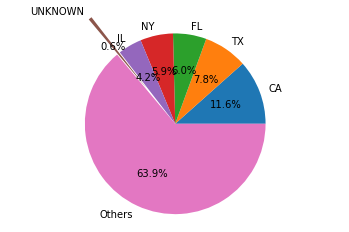

Canada:


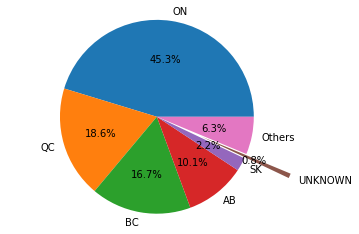

Germany:


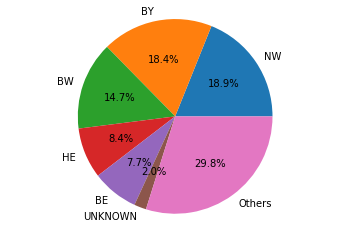

In [12]:
# Summary by Province
create_summary('US', 'stateProvince')
create_summary('Canada', 'stateProvince')
create_summary('Germany', 'stateProvince')

# Investigate # of clicks by Country

In [13]:
table = pd.pivot_table(data_fest, values=['clicks', 'localClicks','% of local clicks'], index=['country'],
                       aggfunc={'clicks': np.mean, 'localClicks': np.mean, '% of local clicks': np.mean}, fill_value=0)

table

,% of local clicks,clicks,localClicks
country,,,
CA,22.062900,27.069116,7.152192
DE,11.413761,17.577621,1.992214
US,15.045973,22.810701,3.664589


There are way more clicks in US, compared to Canada and Germany. The total number of clicks in Germany is a little higher than Canada. However, it is notable that the average number of clicks per the job application is higher in Canada than US. In summary, US has the highest total number of clicks and Canada has the lowest total number of clicks. However, Canada has the highest average number of clicks per application and Germany has the lowest average number of clicks per application.

One of possible ways to increase the number of clicks per application, we need to look into the reasons why Canada has higher average number of clicks than the other countries. There are many factors we need to look into.

Also, it is interesting that the average percentage of local clicks in Canada is higher than Germany by 6% and US by 4%. the proportion of local clicks might be the possible reason for higher number of clicks per application. 

- we can further investigate possible factors of local impacts in Canada, such as Industry by location.

- we can research if there's any other reasons why the average number of clicks per applciation is higher in Canada.


# Investigate industry

In [14]:
data_fest.industry.value_counts()

HEALTH_CARE                                                                                   445864
RETAIL                                                                                        175160
HUMAN_RESOURCES_AND_STAFFING                                                                  119802
CONSULTING_AND_BUSINESS_SERVICES                                                              104204
EDUCATION_AND_SCHOOLS                                                                          80154
                                                                                               ...  
ENERGY_AND_UTILITIES,GOVERNMENT                                                                    4
CONSULTING_AND_BUSINESS_SERVICES,AEROSPACE_AND_DEFENSE                                             3
COMPUTERS_AND_ELECTRONICS,INDUSTRIAL_MANUFACTURING,INTERNET_AND_SOFTWARE                           3
ENERGY_AND_UTILITIES,HUMAN_RESOURCES_AND_STAFFING                                          

There are 186 different industries available for the job applications. Top5 industries from overall applications are health care, retail, human resources and staffing, consulting and buisness services and education and schools. Since there are way more job applications available in US, we cannot conclude top5 industries are also applicable to specific countries. Let's investigate top5 industries by country.

US:


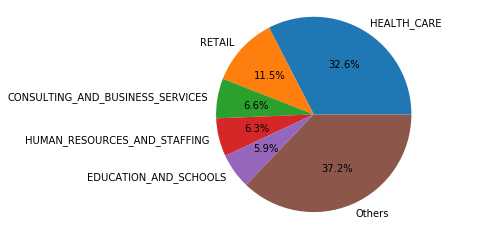

Canada:


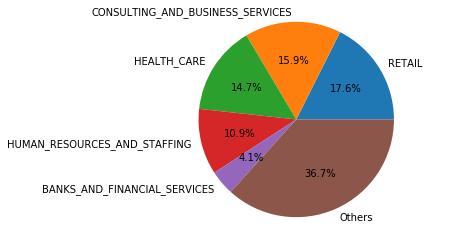

Germany:


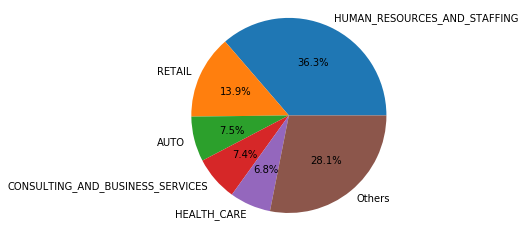

In [15]:
# Summary by Industry
create_summary('US', 'industry')
create_summary('Canada', 'industry')
create_summary('Germany', 'industry')

In [16]:
def print_top5(feature):
    for country in ['US', 'Canada', 'Germany']:
        print('TOP 5 industries in ' + country +":")
        print(list(dict_country[country][feature].value_counts().head(5).index))
        
print_top5('industry')


TOP 5 industries in US:
['HEALTH_CARE', 'RETAIL', 'CONSULTING_AND_BUSINESS_SERVICES', 'HUMAN_RESOURCES_AND_STAFFING', 'EDUCATION_AND_SCHOOLS']
TOP 5 industries in Canada:
['RETAIL', 'CONSULTING_AND_BUSINESS_SERVICES', 'HEALTH_CARE', 'HUMAN_RESOURCES_AND_STAFFING', 'BANKS_AND_FINANCIAL_SERVICES']
TOP 5 industries in Germany:
['HUMAN_RESOURCES_AND_STAFFING', 'RETAIL', 'AUTO', 'CONSULTING_AND_BUSINESS_SERVICES', 'HEALTH_CARE']


As expected, top5 industries from oveall applications (health care, retail, human resources and staffing, consulting and buisness services and education and schools) are mainly affected by USA. 

There are a few things to note:
- the proportion of human resources and staffing jobs in Germany is way higher than the other country
- Auto industry in Germany is more available in job applications than the other countries

# Investigate education level
Here, we are investigating the following variables: 
'educationRequirement', 'jobLanguage', 'licenseRequiredJob', 'experienceRequired', 

## education requirement

In [17]:
data_fest.educationRequirements.value_counts()

None                6389053
Higher Education    3282252
High School         2875011
Name: educationRequirements, dtype: int64

There are three education levels: High School, Higher Education, None (Not specified)

US:


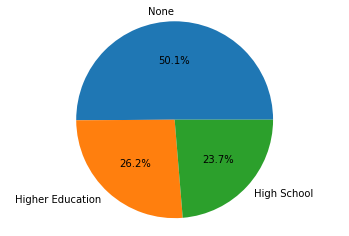

Canada:


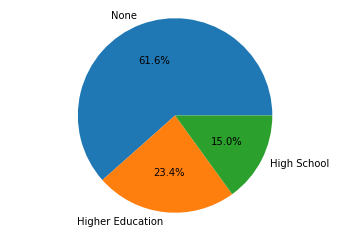

Germany:


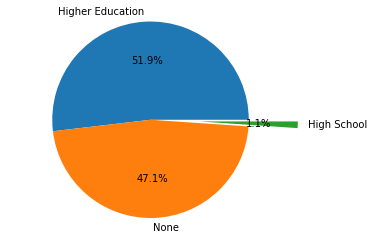

In [18]:
# Summary by Education level
create_summary('US', 'educationRequirements')
create_summary('Canada', 'educationRequirements')
create_summary('Germany', 'educationRequirements')

In US, half of the job applications does not specify the education requirements. The rest of job applications require either high school or higher education with a ratio of nearly half(26.2%) and half (23.7%). 

In Canada, more than 60% of the job applications does not specify the education requirements. 

In German, as similar as other countries, around half of job applications (47.1%) does not specify education requirements. But it is interesting that the job applications with specified education requirement are mostly Higher education, not high school.

Since the average number of clicks per application in Germany is lower than the other countries. We can suspect that the education requirement <strong>"Higher education"</strong> can be one of possible factors affecting lower clicks.


In [19]:
table = pd.pivot_table(data_fest, values=['clicks', 'localClicks'], 
                       index=['educationRequirements'], columns=['country'],
                       aggfunc={'clicks': np.mean, 'localClicks': np.mean}, fill_value=0)
table

clicks                       localClicks            \
country                       CA         DE         US          CA        DE   
educationRequirements                                                          
High School            30.426333  23.397452  25.493848    9.273098  1.775796   
Higher Education       29.337731  16.931752  23.322708    7.031198  1.827384   
None                   27.440492  16.800540  21.275185    7.757469  2.273840   

                                 
country                      US  
educationRequirements            
High School            4.546391  
Higher Education       3.345649  
None                   3.414563

When we look into the pivot table above, the average number of clicks per application does not differ a lot by education requirements. For Germany, since there are 1.1% of job application with high school requirement, we cannot conclude that education requirements have large impacts on the number of clicks.

## job language


US:


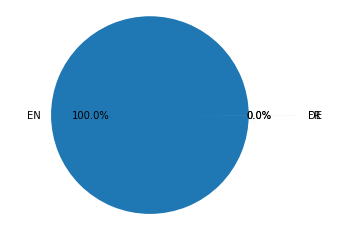

Canada:


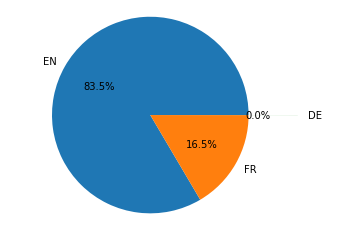

Germany:


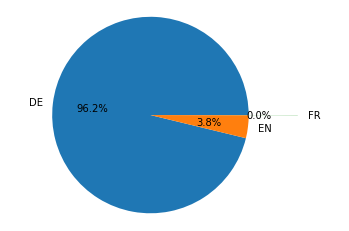

In [20]:
create_summary('US', 'jobLanguage')
create_summary('Canada', 'jobLanguage')
create_summary('Germany', 'jobLanguage')

Most of job language required for job applications are "English" in both US and Canada, although 16% of job applications require French in Canada. In Germany, the job applications mainly requires "German" and less than 4% of job requires "English". We cannot suspect the average job applications is lower due to languages, as the official languages across countries are different.

## experience required

US:


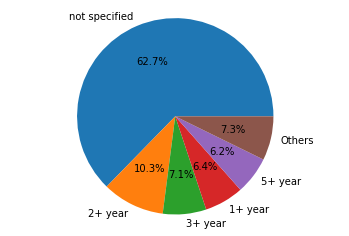

Canada:


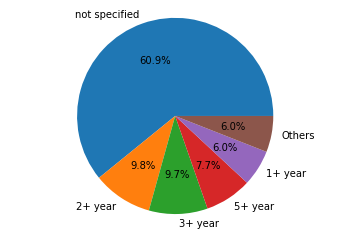

Germany:


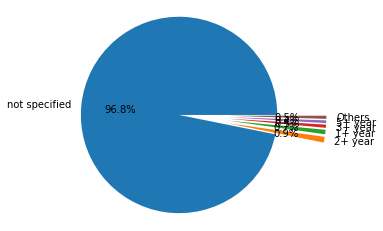

In [21]:
create_summary('US', 'experienceLevel',5)
create_summary('Canada', 'experienceLevel',5)
create_summary('Germany', 'experienceLevel',5)

In [22]:
table = pd.pivot_table(data_fest, values=['clicks', 'localClicks', 'jobId'], 
                       index=['experienceLevel'], columns=['country'],
                       aggfunc={'clicks': np.mean, 'localClicks': np.mean, 'jobId': np.size}, fill_value=0)
table

clicks                         jobId                    \
country                  CA         DE         US      CA       DE       US   
experienceLevel                                                               
1+ year           28.159121  16.127982  23.467855   63436    14127   705482   
10+ year          25.393866  17.703297  20.962618   23409     1729   274543   
2+ year           28.740188  16.132480  25.008919  104591    18116  1124708   
3+ year           26.813760  15.999005  24.803744  102964    10049   782584   
4+ year           26.692948  17.293449  24.229691   13571     2641   201645   
5+ year           27.007872  16.818424  22.884761   82320     8630   678487   
6+ year           23.428456  19.207381  22.361642    7401      569    87346   
7+ year           26.440981  15.193903  21.514087   11132     4002   118091   
8+ year           25.069477  16.211834  20.480688    7758      845   103587   
9+ year           20.164179  10.666667  19.852765     201        3     9040   
less than 1 year  23.745221  15.508999  21.798604   47602     6890   598249   
not specified     27.132072  17.628018  22.335950  647951  1858194  6864142   

                 localClicks                      
country                   CA        DE        US  
experienceLevel                                   
1+ year             7.611798  1.800595  3.846530  
10+ year            5.405741  2.223829  2.640821  
2+ year             7.695586  1.885847  4.030328  
3+ year             6.358747  1.830630  3.827725  
4+ year             6.500111  1.636123  3.557738  
5+ year             6.361212  1.729085  3.152133  
6+ year             4.644643  1.815466  2.938944  
7+ year             5.397323  1.301349  2.672456  
8+ year             5.429105  1.443787  2.491355  
9+ year             2.318408  1.333333  2.232743  
less than 1 year    5.771732  1.435123  3.499010  
not specified       7.505148  2.000952  3.722428

Most of job applications does not specify work experience. If we look into the pivotable above, the average number of clicks and local clicks are similar across experience level. Although average number of clicks in 9+year is smaller than the others, there are only 3 job applications that require 9+year, hence we cannot conlcude that the experience level hugely affects the number of clicks.

## license required

US:


/Users/seeuno/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/base.py:122: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = op(self.values, np.asarray(other))


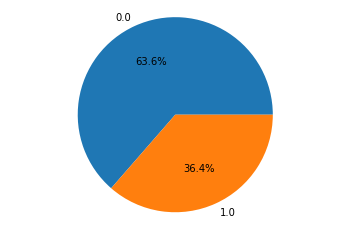

Canada:


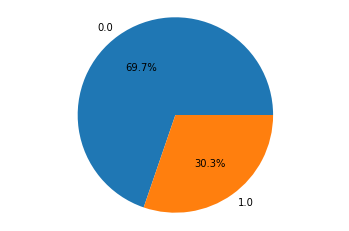

Germany:


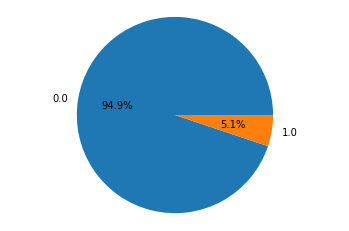

In [23]:
create_summary('US', 'licenseRequiredJob')
create_summary('Canada', 'licenseRequiredJob')
create_summary('Germany', 'licenseRequiredJob')

63.6, 69.7 % of job applications do not require license in US and Canada respectively; however, 94.9% of job applications does not require license in Germany.

In [24]:
table = pd.pivot_table(data_fest, values=['clicks', 'localClicks', 'jobId'], 
                       index=['licenseRequiredJob'], columns=['country'],
                       aggfunc={'clicks': np.mean, 'localClicks': np.mean, 'jobId': np.size}, fill_value=0)
table

clicks                         jobId                  \
country                    CA         DE         US      CA     DE       US   
licenseRequiredJob                                                            
0.0                 28.258095  16.858538  23.142120  647502  68711  7341736   
1.0                 28.505852  18.444295  22.233692  280930   3725  4203712   

                   localClicks                      
country                     CA        DE        US  
licenseRequiredJob                                  
0.0                   8.048554  2.052350  3.800906  
1.0                   7.275731  1.751678  3.426557

As expected, the pivot table indicates that the average of number of clicks and local clicks per applications do not differ by whether the job require license or not.

# External Dataset - Statistics Canada

Check the proportion of job applications, average clicks and average local clicks in Canada

In [25]:

table = pd.pivot_table(df_ca, values=['clicks', 'localClicks', 'jobId','% of local clicks'], 
                       index=['stateProvince'],
                       aggfunc={'clicks': np.mean, 'localClicks': np.mean, 
                                'jobId': np.size, '% of local clicks': np.mean}, fill_value=0)

table.sort_values('jobId', ascending=False)

,% of local clicks,clicks,jobId,localClicks
stateProvince,,,,
ON,20.529050,28.212052,503744,6.691847
QC,17.755540,21.685330,207004,4.280729
BC,21.676959,24.055034,185938,5.834714
AB,34.651623,35.707435,112310,15.145250
SK,27.679881,24.477193,24883,8.462525
MB,37.651486,33.360271,23907,17.117539
NS,20.287488,26.174025,19434,5.986776
NB,23.035217,23.092384,13996,6.176193
UNKNOWN,6.950772,38.115380,8719,1.825209


Top 4 provinces, Ontario, Quebec, British Columbia and Alberta, have higher number of job applications than the other provinces. 

Firstly, observe the average number of clicks per job applications. 
Quebec has the lowest and Alberta has the highest average number of clicks per job applications.

Secondly, observe the average number of local clicks per job applications.
Quebec has the lowest and Alberta has the highest average number of clicks per job application.

Lastly, observe the average % of local clicks to total number of clicks per job applications.
Quebec has the lowest and Alberta has the highest.

Investigate possible reasons why Quebec has lowest average number of clicks, local clicks and % local clicks per job applications and Alberta has highest average number of clicks, local clicks and % local clicks per job applications among 4 provinces.

In [26]:
stat_ca = pd.read_csv('data/2018statcanada-cpi.csv') #https://www150.statcan.gc.ca/t1/tbl1/en/cv.action?pid=1810000413#timeframe
stat_ca.columns = ['geography','productGroup', 'April2017','March2018','April2018','monthly%chg','yearl%chg']
stat_ca.head()

,geography,productGroup,April2017,March2018,April2018,monthly%chg,yearl%chg
0,Canada,All-items,130.4,132.9,133.3,0.3,2.2
1,Canada,Food,142.2,144.2,144.8,0.4,1.8
2,Canada,Shelter,137.9,140,140.3,0.2,1.7
3,Canada,"Household operations, furnishings and equipment",122.2,122.9,123.9,0.8,1.4
4,Canada,Clothing and footwear,94.1,95,96.2,1.3,2.2


In [27]:
external_df = stat_ca[['geography', 'productGroup','April2018']]

In [28]:
# Choose top 4 provinces with high number of job applications
on = external_df[external_df.geography == 'Ontario']
qc = external_df[external_df.geography == 'Quebec']
bc = external_df[external_df.geography == 'British Columbia']
ab = external_df[external_df.geography == 'Alberta']


In [29]:
top4prov = external_df[external_df.geography.isin(['Ontario', 'Quebec', 'British Columbia','Alberta'])]
top4prov.head()

,geography,productGroup,April2018
100,Quebec,All-items,129.2
101,Quebec,Food,144.7
102,Quebec,Shelter,132.4
103,Quebec,"Household operations, furnishings and equipment",122.7
104,Quebec,Clothing and footwear,96.6


In [30]:
top4prov = top4prov.reset_index()
top4prov = top4prov.drop(columns=['index'])
top4prov['CPI'] = top4prov['April2018'].apply(lambda x: float(x))
top4prov.head()


,geography,productGroup,April2018,CPI
0,Quebec,All-items,129.2,129.2
1,Quebec,Food,144.7,144.7
2,Quebec,Shelter,132.4,132.4
3,Quebec,"Household operations, furnishings and equipment",122.7,122.7
4,Quebec,Clothing and footwear,96.6,96.6


In [31]:
table = pd.pivot_table(top4prov, values=['CPI'], 
                       index=['geography'], columns = ['productGroup'],
                       aggfunc={'CPI': np.mean}, fill_value=0)
table

CPI  \
productGroup     Alcoholic beverages, tobacco products and recreational cannabis   
geography                                                                          
Alberta                                                       169.6                
British Columbia                                              153.8                
Ontario                                                       174.6                
Quebec                                                        155.4                

                            \
productGroup     All-items   
geography                    
Alberta              140.6   
British Columbia     127.7   
Ontario              134.8   
Quebec               129.2   

                                                                                                                            \
productGroup     All-items excluding alcoholic beverages, tobacco products and smokers' supplies and recreational cannabis   
geography                                                                                                                    
Alberta                                                       139.7                                                          
British Columbia                                              126.9                                                          
Ontario                                                       133.7                                                          
Quebec                                                        128.1                                                          

                                                                      \
productGroup     All-items excluding energy All-items excluding food   
geography                                                              
Alberta                               137.7                    140.3   
British Columbia                      124.5                    125.3   
Ontario                               132.7                    132.7   
Quebec                                126.4                    125.7   

                                                      \
productGroup     All-items excluding food and energy   
geography                                              
Alberta                                        136.6   
British Columbia                               121.3   
Ontario                                        129.9   
Quebec                                         121.7   

                                                                     \
productGroup     All-items excluding gasoline Clothing and footwear   
geography                                                             
Alberta                                 139.0                  98.0   
British Columbia                        125.2                 106.3   
Ontario                                 132.9                  91.7   
Quebec                                  126.9                  96.6   

                                                                              \
productGroup     Durable goods Energy   Food  Goods Health and personal care   
geography                                                                      
Alberta                   91.6  178.9  142.7  121.4                    136.1   
British Columbia          90.3  174.1  139.5  120.8                    119.5   
Ontario                   88.2  168.2  147.0  120.4                    128.6   
Quebec                    90.6  158.9  144.7  122.8                    124.7   

                                                                  \
productGroup     Household operations, furnishings and equipment   
geography                                                          
Alberta                                                    123.4   
British Columbia                                           120.5   
Ontario                                                    126.2   
Quebec                       

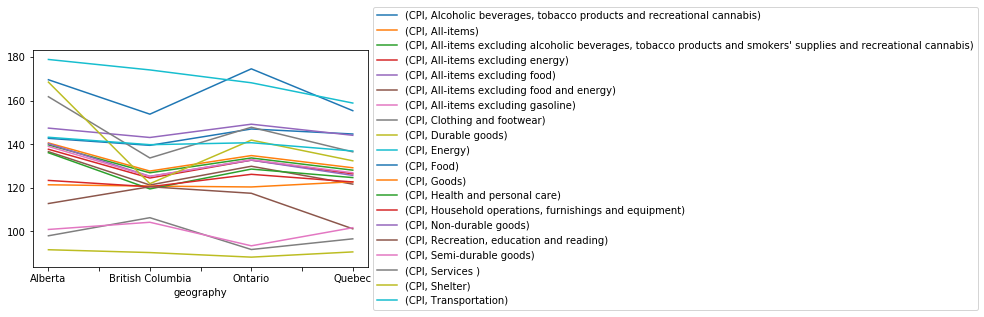

In [32]:
fig= table.plot()


# Put a legend to the right of the current axis
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))



In [33]:
stat_ca_edu = pd.read_csv('data/2016statcanada-education.csv') #https://www12.statcan.gc.ca/census-recensement/2016/dp-pd/hlt-fst/edu-sco/Table.cfm?Lang=E&T=11&Geo=00&View=2&Age=2
stat_ca_edu.head()

,Geographic name,Global non-response rate,"No certificate, diploma or degree",Secondary (high) school diploma or equivalency certificate,"Apprenticeship or trades certificate or diploma[3],[4]","College, CEGEP or other non-university certificate or diploma",University certificate or diploma below bachelor level,"University certificate, diploma or degree at bachelor level or above"
0,Canada,5.1,11.5,23.7,10.8,22.4,3.1,28.5
1,Newfoundland and Labrador,6.8,15.7,22.7,12.5,28.5,2.3,18.3
2,Prince Edward Island,5.6,12.0,25.1,8.4,28.2,2.5,23.7
3,Nova Scotia,5.5,12.2,23.5,10.6,25.9,2.3,25.5
4,New Brunswick,4.9,13.9,28.5,9.4,26.1,1.9,20.2


In [34]:
stat_ca_edu.columns = ['geography', 'nonResponseRate', 'noDegree', 'High School', 
                       'Apprenticeship','college','university below bachelor', 'university at bachelor']

for col in stat_ca_edu.columns:
    if col != 'geography':
        stat_ca_edu[col] = stat_ca_edu[col].apply(lambda x: float(x))


In [35]:
stat_ca_edu['Higher Education'] = stat_ca_edu[['Apprenticeship','college','university below bachelor',
                                               'university at bachelor']].sum(axis=1)
stat_ca_edu.head()

,geography,nonResponseRate,noDegree,High School,Apprenticeship,college,university below bachelor,university at bachelor,Higher Education
0,Canada,5.1,11.5,23.7,10.8,22.4,3.1,28.5,64.8
1,Newfoundland and Labrador,6.8,15.7,22.7,12.5,28.5,2.3,18.3,61.6
2,Prince Edward Island,5.6,12.0,25.1,8.4,28.2,2.5,23.7,62.8
3,Nova Scotia,5.5,12.2,23.5,10.6,25.9,2.3,25.5,64.3
4,New Brunswick,4.9,13.9,28.5,9.4,26.1,1.9,20.2,57.6


In [36]:
top4provedu = stat_ca_edu[stat_ca_edu.geography.isin(['Ontario', 'Quebec', 'British Columbia','Alberta'])]
top4provedu = top4provedu[['geography', 'noDegree','High School', 'Higher Education']]
top4provedu.sort_values('geography')

,geography,noDegree,High School,Higher Education
9,Alberta,10.8,25.2,64.0
10,British Columbia,9.6,26.5,63.8
6,Ontario,10.4,24.5,65.2
5,Quebec,13.3,18.5,68.1


Let's look into education requirements from Indeed Datasets

In [37]:
table = pd.pivot_table(df_ca[df_ca.stateProvince.isin(['ON','QC','BC','AB'])], 
                       values=['clicks', 'localClicks', 'jobId'], 
                       index=['stateProvince'], columns=['educationRequirements'],
                       aggfunc={'clicks': np.mean, 'localClicks': np.mean, 'jobId': np.size}, fill_value=0)

table

clicks                                   jobId  \
educationRequirements High School Higher Education       None High School   
stateProvince                                                               
AB                      41.317902        37.592317  34.418391       19182   
BC                      24.077026        24.895312  23.853052       26082   
ON                      30.022926        29.741933  27.646204       75156   
QC                      26.315466        23.287378  22.510608        5037   

                                               localClicks                   \
educationRequirements Higher Education    None High School Higher Education   
stateProvince                                                                 
AB                               23663   65936   18.168648        15.750750   
BC                               39422  118967    6.674526         4.756050   
ON                              114881  301055    7.783650         6.081423   
QC                               17002   25405    5.325392         5.296730   

                                  
educationRequirements       None  
stateProvince                     
AB                     14.687712  
BC                      6.060126  
ON                      6.832665  
QC                      4.984649

The average number of clicks per job applications 

In [38]:
table = pd.pivot_table(df_ca[df_ca.stateProvince.isin(['ON','QC','BC','AB'])], values=['jobId'], 
                       index=['industry'], columns=['stateProvince'],
                       aggfunc={'jobId': np.size}, fill_value=0)
table

jobId                  
stateProvince                                         AB    BC    ON    QC
industry                                                                  
AEROSPACE_AND_DEFENSE                                  2     7    83   263
AGRICULTURE_AND_EXTRACTION                            77    21   145   111
AGRICULTURE_AND_EXTRACTION,ENERGY_AND_UTILITIES       24     0     0     0
AUTO                                                 222   531   472   445
AUTO,INDUSTRIAL_MANUFACTURING                          0     0     3     0
BANKS_AND_FINANCIAL_SERVICES                         254   433   915  1289
BANKS_AND_FINANCIAL_SERVICES,HEALTH_CARE               0     0    41     0
COMPUTERS_AND_ELECTRONICS                             37   202   385   384
CONSTRUCTION                                         344   674  1085   264
CONSTRUCTION,CONSULTING_AND_BUSINESS_SERVICES          0    33     0     0
CONSTRUCTION,INDUSTRIAL_MANUFACTURING                  0     0     0    30
CONSULTING_AND_BUSINESS_SERVICES                    1172  1154  6589  1007
CONSULTING_AND_BUSINESS_SERVICES,HUMAN_RESOURCE...     0    13    20     0
CONSULTING_AND_BUSINESS_SERVICES,HUMAN_RESOURCE...     0     0     0    60
CONSULTING_AND_BUSINESS_SERVICES,INTERNET_AND_S...     0     0     7     0
CONSULTING_AND_BUSINESS_SERVICES,MEDIA_NEWS_AND...     0     0     9     0
CONSULTING_AND_BUSINESS_SERVICES,TRANSPORT_AND_...     0    40   162    70
CONSUMER_GOODS_AND_SERVICES                          292   578  1184   243
CONSUMER_GOODS_AND_SERVICES,FOOD_AND_BEVERAGES         0     0    53     0
CONSUMER_GOODS_AND_SERVICES,INDUSTRIAL_MANUFACT...     0     6    85     0
CONSUMER_GOODS_AND_SERVICES,RETAIL                    12    49   270   118
EDUCATION_AND_SCHOOLS                                284   517   995   256
ENERGY_AND_UTILITIES                                 344    19   293    53
ENERGY_AND_UTILITIES,INDUSTRIAL_MANUFACTURING          0     0     0    25
ENERGY_AND_UTILITIES,PHARMACEUTICALS                   0     0    29     0
FOOD_AND_BEVERAGES                                   126   167   863   154
FOOD_AND_BEVERAGES,INDUSTRIAL_MANUFACTURING            0     0    11   123
FOOD_AND_BEVERAGES,RESTAURANTS_TRAVEL_AND_LEISURE      0     0    21     0
GOVERNMENT                                           921   166   468   621
HEALTH_CARE                                         1825  3319  4416   220
HEALTH_CARE,REAL_ESTATE                                3     0   345     0
HUMAN_RESOURCES_AND_STAFFING                         353   524  3116  3385
HUMAN_RESOURCES_AND_STAFFING,INDUSTRIAL_MANUFAC...     0     0     0    28
INDUSTRIAL_MANUFACTURING                             753   198   688   561
INDUSTRIAL_MANUFACTURING,TELECOMMUNICATIONS            0     0    79     0
INSURANCE                                            112    74   609   257
INTERNET_AND_SOFTWARE                                 36   117   468   366
INTERNET_AND_SOFTWARE,MEDIA_NEWS_AND_PUBLISHING        0     0   227     0
MEDIA_NEWS_AND_PUBLISHING                              0    49   230   109
ORGANIZATION                                         170    80   103     1
PHARMACEUTICALS                                        0     0    48    93
REAL_ESTATE                                          111   107   378    31
RESTAURANTS_TRAVEL_AND_LEISURE                       453   480   511   111
RETAIL                                              1739  2297  6283   769
TELECOMMUNICATIONS                                    70    79   248   200
TRANSPORT_AND_FREIGHT                                204   329  1232   187